### Generate graph 2.3, solve exercise 2.6 for stationary cases ###

In [2]:
#%%
import numpy as np
import matplotlib.pyplot as plt
#import pdb

In [6]:
#%%Initialisations
#total number of bandit arms
n = 10

#total number of experiments
t = 1000

#probability of random exploration(fraction)
epsilon = []
epsilon = [0,0.1]

#number of bandits(episodes)
bandit_number = 2000

#current value estimate of action
Q = np.zeros((bandit_number,n))
init_value = 5.0
Q_opt = np.full((bandit_number,n),5.0)
Q_greedy = np.zeros((bandit_number,n))
Q_star_s = np.random.normal(loc = 0, scale = 1, size = (bandit_number,n) )


#number of times an action was chosen for each bandit
alpha = 0.1

#optimal action that should be chosen for each bandit
a_opt = np.zeros((bandit_number,n)) 

#cumulative reward at each episode for chossing an action by probability epsilon
avg_reward = np.asmatrix(np.zeros((len(epsilon),t)))

opt_act = np.asmatrix(np.zeros((len(epsilon),t)))
opt_act_s = np.asmatrix(np.zeros((len(epsilon),t)))

#function Bandit taking action and bandit as input, returning reward.

def bandit(a,ids):
    R = np.random.normal(loc=Q_star[ids,a],scale=1,size=1)
    return R

def bandit_s(a,ids):
    R_s = np.random.normal(loc = Q_star_s[ids,a], scale = 1, size = 1)
    return R_s

In [7]:
#%%A simple bandit algorithm
for est in range(2):
    for k in range(len(epsilon)):
        if (epsilon[k] == 0):
            Q = Q_opt.copy()
        else :
            Q = Q_greedy.copy()
    
        #Q = np.zeros((bandit_number,n))
        Q_star = np.asarray(np.zeros((bandit_number,n)))
        for j in range(n):
            init_value = np.random.normal(loc = 0, scale = 1)
            Q_star[:,j] = np.asarray([[init_value for row in range(bandit_number)] ])

        for episode in range(1, t):
            local_reward = 0.0
            local_reward_s = 0.0
            action_history = 0.0
            action_history_s = 0.0
            upper_rewards = 0.0
            for machine in range(1,bandit_number):
                p = np.random.rand()  
                if p <= epsilon[k]:      
                    a =  np.random.randint(1,high=n)
                else:
                    a = np.argmax(Q[machine,:])
    
                #reward for choosing an action a for corresponding machine
                #update number of times action was chosen
                if est == 0:
                    rewards = bandit(a,machine)
                    Q[machine,a] = Q[machine,a] + alpha*(rewards-Q[machine,a])
                    #adding the local rewards
                    local_reward += rewards
                    #calculating an optimal action for each bandit
                    idx = np.argmax(Q_star[machine,:])
                    action_history += (a==idx)
                else:
                    rewards_s = bandit_s(a,machine)
                    Q[machine,a] = Q[machine,a] + alpha*(rewards_s-Q[machine,a])
                    local_reward_s += rewards_s
                    idx = np.argmax(Q_star_s[machine,:])
                    action_history_s += (a==idx)
                    
            #update Q_star value with a noise 
            if (est == 0):
                Q_star += np.random.normal(loc= 0, scale = 0.01, size = (bandit_number,n))
                opt_act[k,episode]= (action_history/bandit_number)
            else:
                opt_act_s[k,episode] = (action_history_s/bandit_number)

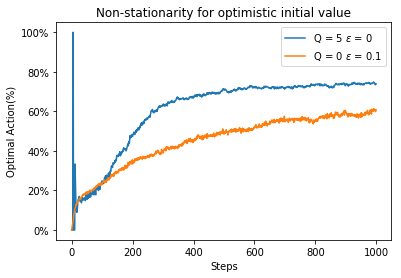

In [8]:
#%%plot graph of percentage of chossing optimal actions
for reward1 in range(len(epsilon)):
    if epsilon[reward1] == 0:
        ax = plt.plot(100*opt_act[reward1,:].T,label='Q = 5 ' + '$\epsilon$ = ' +str(epsilon[reward1]))
    else:
        ax = plt.plot(100*opt_act[reward1,:].T,label = 'Q = 0 ' + '$\epsilon$ = ' + str(epsilon[reward1]))
    plt.xlabel('Steps')
    plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
    plt.ylabel('Optimal Action(%)')
    plt.title('Non-stationarity for optimistic initial value')
    plt.legend()

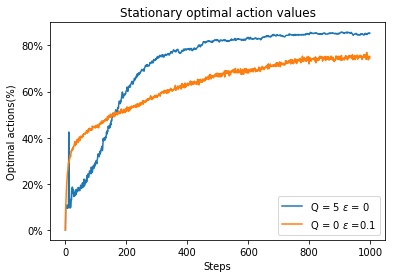

In [9]:
#%%plot graph for stationarity
for reward2 in range(len(epsilon)):
    if epsilon[reward2] == 0:
        ax = plt.plot(100*opt_act_s[reward2,:].T,label = 'Q = 5 ' + '$\epsilon$ = ' + str(epsilon[reward2]))
    else:
        ax = plt.plot(100*opt_act_s[reward2,:].T,label = 'Q = 0 ' + '$\epsilon$ =' + str(epsilon[reward2]))
    plt.xlabel('Steps')
    plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
    plt.title('Stationary optimal action values')
    plt.ylabel('Optimal actions(%)')
    plt.legend()